<a href="https://colab.research.google.com/github/liam-haas/CLPS0950_FinalProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install rdkit-pypi

In [2]:
from rdkit import Chem
from rdkit.Chem import *
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import RDKFingerprint
import numpy as np

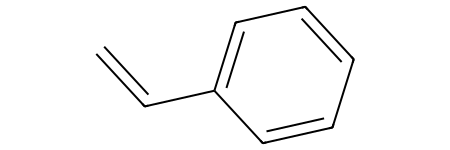

In [ ]:
test = Chem.MolFromSmiles('C=CC1=CC=CC=C1')
test

In [ ]:
substruc = Chem.MolFromSmiles('c1ccccc1')
test.HasSubstructMatch(substruc)

True

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [95]:
import pandas as pd

test_table = pd.read_csv('/content/drive/MyDrive/Test SMILES sequences - Classes.csv')
test_table = test_table.dropna(axis = 1)

,SMILES sequence,Class,Molecule
0,C=C,0,
1,C=CC,0,
2,C=CCC,0,
3,C/C=C/C,0,
4,C=CCCC,0,
...,...,...,...
93,I/C(C)=C/C,5,
94,I/C(C)=C(C)/C,5,
95,I/C(C)=C(C)/CC,5,
96,I/C(CC)=C(C)/C,5,

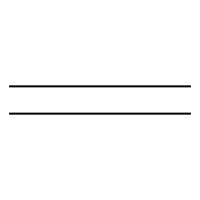
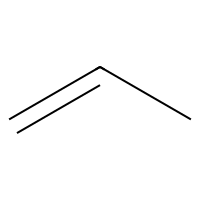
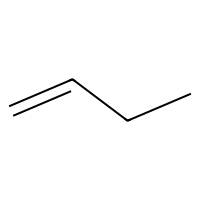
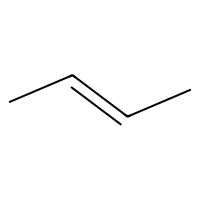
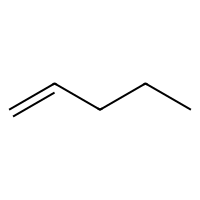
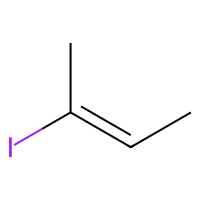
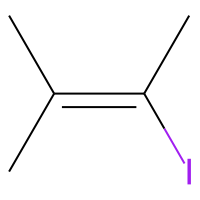
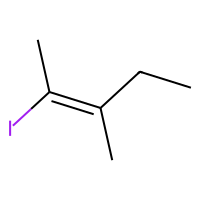
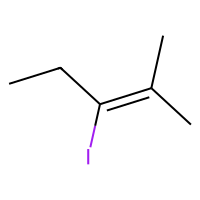
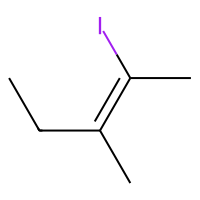

In [96]:
PandasTools.AddMoleculeColumnToFrame(test_table, 'SMILES sequence', 'Molecule')
test_table

In [6]:
%pip install scikit-learn
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Should do extended fingerprint connectivity because just ones and zeros for the entries. Then need to hash into a single number. Simplest way is value in the entry times 2 to the power of the entry summed over the array. Maybe looks for a converter. This should allow for classification algorithm to run. Can also try ASCII for smiles, see if they look similar. 

In [7]:
import math

In [24]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(test_table.loc[0,'Molecule'], 2, nBits=128, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
hash = 0
fp_list = fp_arr.tolist()
for entry in fp_list:
  hash += entry * math.pow(2, fp_list.index(entry))
hash

3.022314549036573e+23

,SMILES sequence,Class,Molecule,fingerprint
0,C=C,0,,1.791796e+103
1,C=CC,0,,5.153961e+10
2,C=CCC,0,,6.871948e+10
3,C/C=C/C,0,,4.294967e+10
4,C=CCCC,0,,7.680000e+02
...,...,...,...,...
93,I/C(C)=C/C,5,,7.730941e+10
94,I/C(C)=C(C)/C,5,,6.871948e+10
95,I/C(C)=C(C)/CC,5,,1.116691e+11
96,I/C(CC)=C(C)/C,5,,1.116691e+11

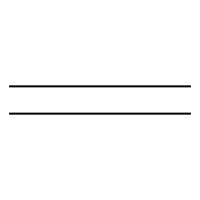
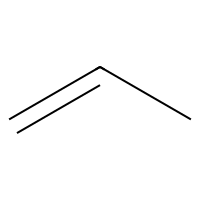
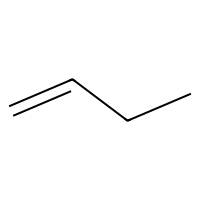
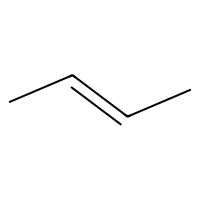
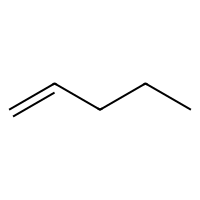
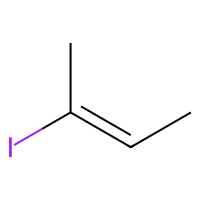
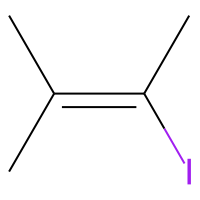
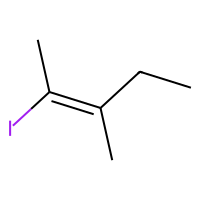
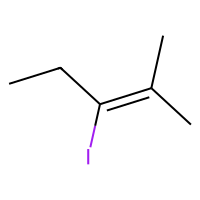
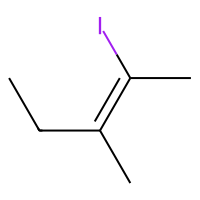

In [97]:
hash_list = []
for mol in test_table['Molecule']:
  bi = {}
  fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=512, bitInfo=bi)
  fp_arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fingerprint, fp_arr)
  fp_list = fp_arr.tolist()
  hash = 0
  for entry in fp_list:
    hash += entry * math.pow(2, fp_list.index(entry))
  hash_list.append(hash)
test_table['fingerprint'] = hash_list
test_table

In [98]:
test_table = test_table.drop(index = 0)
feature = test_table[['fingerprint']]
target = test_table['Class']

0.4666666666666667


Text(50.72222222222221, 0.5, 'True Class')

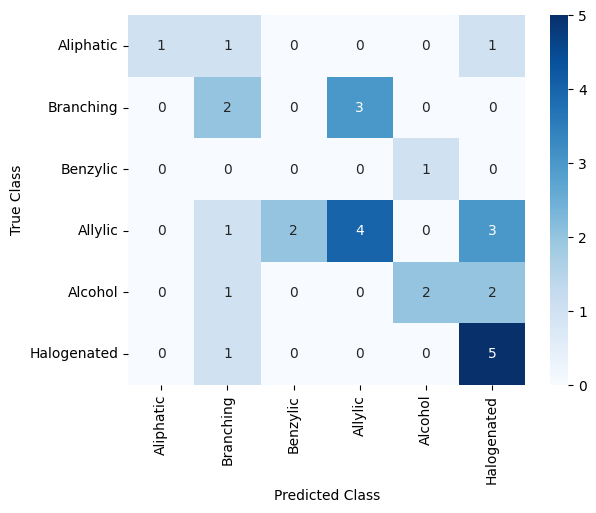

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators = 200, max_depth = 7)
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = .30)

model.fit(x_train, y_train)
print(model.score(x_test, y_test))

prediction = model.predict(x_test)
conf_mat = confusion_matrix(y_test, prediction)
labels = ['Aliphatic', 'Branching', 'Benzylic', 'Allylic', 'Alcohol', 'Halogenated']
sns.heatmap(conf_mat, annot = True, cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

In [30]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

splitter = ShuffleSplit(n_splits = 5)
scores = cross_val_score(model, feature, target, cv = splitter)
scores.mean()

0.36

0.3333333333333333


<Axes: >

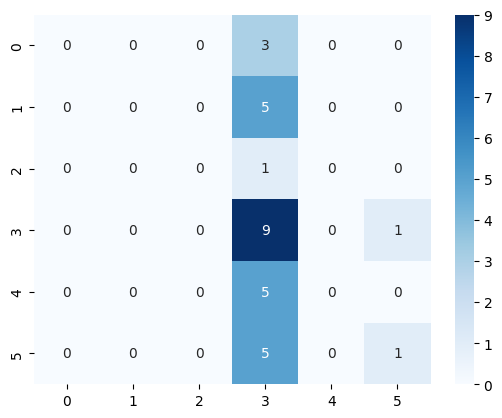

In [31]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(x_train, y_train)
prediction2 = model2.predict(x_test)
print(model2.score(x_test, y_test))

conf_mat2 = confusion_matrix(y_test, prediction2)
sns.heatmap(conf_mat2, annot = True, cmap = 'Blues')

In [ ]:
dir(Descriptors)

In [137]:
test_table['weight'] = [Descriptors.MolWt(mol) for mol in test_table['Molecule']]
test_table['count'] = [Descriptors.NumValenceElectrons(mol) for mol in test_table['Molecule']]
test_table['charge'] = [Descriptors.MinAbsPartialCharge(mol) for mol in test_table['Molecule']]
test_table['energy'] = [Descriptors.MinAbsEStateIndex(mol) for mol in test_table['Molecule']]
test_table['bonds'] = [Descriptors.NumRotatableBonds(mol) for mol in test_table['Molecule']]
test_table['kappa'] = [Descriptors.Kappa1(mol) for mol in test_table['Molecule']]
test_table['chi'] = [Descriptors.Chi0(mol) for mol in test_table['Molecule']]
test_table

,SMILES sequence,Class,Molecule,fingerprint,weight,count,charge,energy,bonds,kappa,chi
1,C=CC,0,<rdkit.Chem.rdchem.Mol object at 0x7f890286d380>,5.153961e+10,42.081,18,0.047260,1.750000,0,2.74,2.707107
2,C=CCC,0,<rdkit.Chem.rdchem.Mol object at 0x7f88fe1ca650>,6.871948e+10,56.108,24,0.038200,1.083333,1,3.74,3.414214
3,C/C=C/C,0,<rdkit.Chem.rdchem.Mol object at 0x7f88fe1ca6c0>,4.294967e+10,56.108,24,0.047002,2.000000,0,3.74,3.414214
4,C=CCCC,0,<rdkit.Chem.rdchem.Mol object at 0x7f88fe1cab90>,7.680000e+02,70.135,30,0.035604,1.152778,2,4.74,4.121320
5,C/C=C\C,0,<rdkit.Chem.rdchem.Mol object at 0x7f88fe1ca420>,4.294967e+10,56.108,24,0.047002,2.000000,0,3.74,3.414214
...,...,...,...,...,...,...,...,...,...,...,...
93,I/C(C)=C/C,5,<rdkit.Chem.rdchem.Mol object at 0x7f88fdc5e260>,7.730941e+10,182.004,30,0.016772,1.349630,0,5.47,4.284457
94,I/C(C)=C(C)/C,5,<rdkit.Chem.rdchem.Mol object at 0x7f88fdc5e2d0>,6.871948e+10,196.031,36,0.013863,1.395926,0,6.47,5.154701
95,I/C(C)=C(C)/CC,5,<rdkit.Chem.rdchem.Mol object at 0x7f88fdc5e340>,1.116691e+11,210.058,42,0.013594,1.189259,1,7.47,5.861807
96,I/C(CC)=C(C)/C,5,<rdkit.Chem.rdchem.Mol object at 0x7f88fdc5e3b0>,1.116691e+11,210.058,42,0.011032,1.183426,1,7.47,5.861807


In [154]:
features = test_table[['fingerprint', 'weight', 'count', 'charge', 'energy', 'bonds', 'kappa', 'chi']]
target = test_table['Class']

0.96


<Axes: >

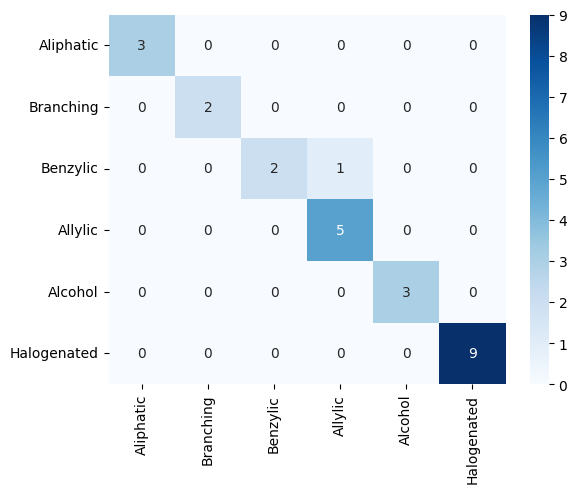

In [153]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .25)

model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(model.score(X_test, y_test))

conf_mat = confusion_matrix(y_test, prediction)
sns.heatmap(conf_mat, annot = True, cmap = 'Blues', xticklabels = labels, yticklabels = labels)

In [152]:
scores = cross_val_score(model, features_s, target, cv = splitter)
scores.mean()

0.9800000000000001

In [149]:
test = Chem.MolFromSmiles('C/C=C(C)/CC(C(C)CC)CCC')

model.fit(features, target)

df = pd.DataFrame()
fingerprint = AllChem.GetMorganFingerprintAsBitVect(test, radius = 2, nBits = 512)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fingerprint, fp_arr)
fp_list = fp_arr.tolist()
hash = 0
for entry in fp_list:
  hash += entry * math.pow(2, fp_list.index(entry))
df['fingerprint'] = [hash]
df['weight'] = [Descriptors.MolWt(test)]
df['count'] = [Descriptors.NumValenceElectrons(test)]
df['charge'] = [Descriptors.MinAbsPartialCharge(test)]
df['energy'] = [Descriptors.MinAbsEStateIndex(test)]
df['bonds'] = [Descriptors.NumRotatableBonds(test)]
df['kappa'] = [Descriptors.Kappa1(test)]
df['chi'] = [Descriptors.Chi0(test)]

model.predict(df)

array([1])

Predicted the right class